In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('Air Pollution.csv')

In [3]:
df.head()

,Location,PM1,PM2.5,PM10,CO
0,Bakhrabad Gas Office,149.75,253.00,325.25,11
1,Bibir Bazar BGB Camp,50.25,83.75,107.25,0
2,Cumilla Govt. College,21.00,35.25,45.50,6
3,EPZ Mosjid,53.25,85.75,112.00,15
4,BEPZA Public School And College,56.75,93.75,121.25,11


In [4]:
df = df.rename(columns = {'Location' : 'Sampling Point', "PM2.5" : "PM2_5", 'CO': 'Carbon Monoxide'})

In [5]:
df.head()

,Location,PM1,PM2_5,PM10,Carbon Monoxide
0,Bakhrabad Gas Office,149.75,253.00,325.25,11
1,Bibir Bazar BGB Camp,50.25,83.75,107.25,0
2,Cumilla Govt. College,21.00,35.25,45.50,6
3,EPZ Mosjid,53.25,85.75,112.00,15
4,BEPZA Public School And College,56.75,93.75,121.25,11


In [6]:
df.shape

(71, 5)

In [7]:
df.describe()

,PM1,PM2_5,PM10,Carbon Monoxide
count,71.000000,71.000000,71.000000,71.000000
mean,52.845070,125.285211,159.873239,11.112676
std,24.297133,117.031179,178.508468,11.073197
min,21.000000,35.250000,13.000000,0.000000
25%,40.750000,73.375000,79.500000,7.000000
50%,52.000000,86.250000,112.750000,9.000000
75%,58.250000,107.125000,142.875000,13.500000
max,164.750000,786.000000,1245.000000,87.000000


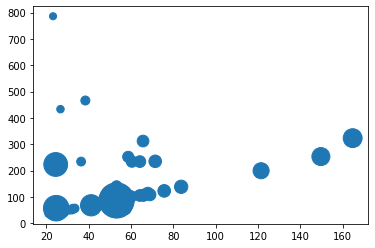

In [8]:
plt.scatter (df.PM1, df.PM2_5, df.PM10, cmap = 'viridis') 

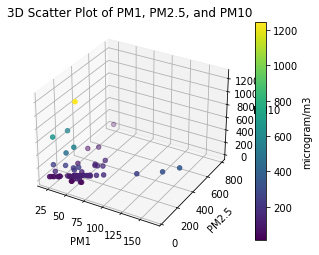

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df.PM1, df.PM2_5, df.PM10, c=df.PM10, cmap='viridis')

ax.set_xlabel('PM1')
ax.set_ylabel('PM2.5')
ax.set_zlabel('PM10')
ax.set_title('3D Scatter Plot of PM1, PM2.5, and PM10')
fig.colorbar(scatter, label='microgram/m3')
plt.show()

Text(0.5, 1.0, 'Relation between PM1 and PM10')

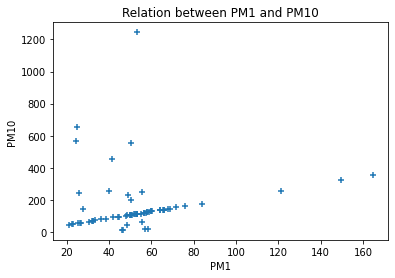

In [10]:
plt.scatter (df.PM1, df.PM10, cmap = 'viridis', marker = '+') 
plt.xlabel ('PM1')
plt.ylabel('PM10')
plt.title ('Relation between PM1 and PM10')

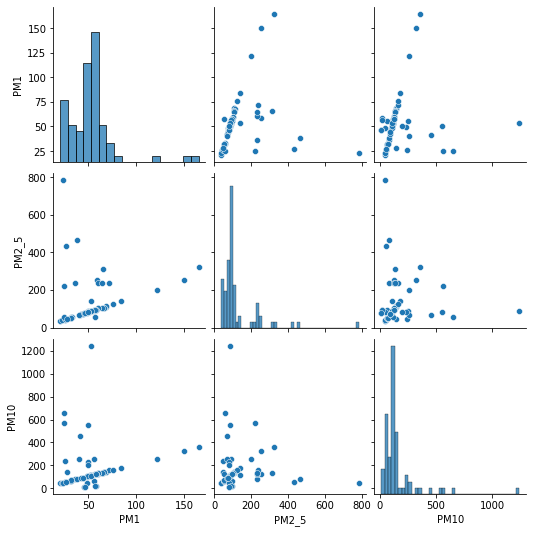

In [11]:
sns.pairplot (df[['PM1', 'PM2_5', 'PM10']])

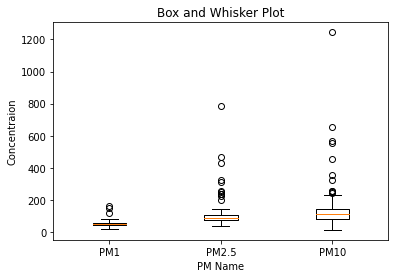

In [12]:
data = [df.PM1, df.PM2_5, df.PM10]
labels = ['PM1', 'PM2.5', 'PM10']
plt.boxplot(data, labels=labels)
plt.ylabel('Concentraion')
plt.xlabel('PM Name')
plt.title('Box and Whisker Plot')
plt.show()

In [13]:
plt.savefig('box_plot.jpg', format='jpg')

plt.show()

<Figure size 432x288 with 0 Axes>

In [14]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans (n_clusters= 3)

In [16]:
km.fit (df[['PM2_5' , 'PM10']])

KMeans(n_clusters=3)

In [17]:
km.predict (df[['PM2_5' , 'PM10']])

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1])

In [18]:
df ['Particulate_Matter_clusters'] = km.predict (df[['PM2_5' , 'PM10']])

In [19]:
df.head()

,Location,PM1,PM2_5,PM10,Carbon Monoxide,Particulate_Matter_clusters
0,Bakhrabad Gas Office,149.75,253.00,325.25,11,2
1,Bibir Bazar BGB Camp,50.25,83.75,107.25,0,1
2,Cumilla Govt. College,21.00,35.25,45.50,6,1
3,EPZ Mosjid,53.25,85.75,112.00,15,1
4,BEPZA Public School And College,56.75,93.75,121.25,11,1


In [24]:
center = km.cluster_centers_
center

array([[103.7       , 694.        ],
       [ 81.76851852, 110.95833333],
       [330.10416667, 157.4375    ]])

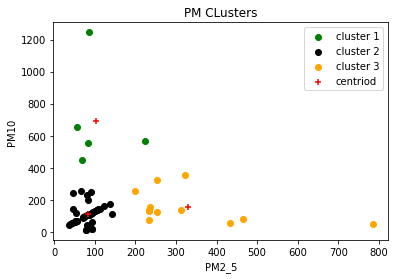

In [28]:
df0 = df [df.Particulate_Matter_clusters ==0]
df1 = df [df.Particulate_Matter_clusters ==1]
df2 = df[df.Particulate_Matter_clusters ==2]

plt.scatter (df0.PM2_5 , df0.PM10, color = 'green' , marker = 'o', label = 'cluster 1')
plt.scatter (df1.PM2_5, df1.PM10, color = 'black', marker = 'o', label = 'cluster 2')
plt.scatter (df2.PM2_5, df2.PM10, color = 'orange', marker = 'o', label = 'cluster 3')
plt.scatter (center[:, 0], center [:,1], color = "red" ,  marker = "+", label = "centriod")
plt.xlabel ("PM2_5")
plt.ylabel ('PM10')
plt.title ('PM CLusters')
plt.legend()
plt.show()